# Tarea 2: Machine Learning for Business Intelligence

## Instrucciones

1. Esta tarea es de caracter individual, por lo tanto queda estrictamente prohibida la copia de codigo ajeno.

2. En caso de elaborar su respuesta **basandose** en código ajeno encontrado en la web, debe agradecer al menos citando la referencia.

3. La discusión con compañeros es siempre bienvenida, no obstante cada respuesta debe ser redactada de manera individual.

4. La fecha límite para la entrega de esta tarea queda establecida para el 15/06/2020.

Nota: La resolución de algunos de los ejercicios puede tomar bastante tiempo, así como su ejecución. Por lo tanto se recomienda hacer la tarea con anticipación y evitar riesgos.

## Pregunta 1: Construyendo una red neuronal desde cero

Para este ejercicio construiremos una red neuronal simple desde cero, la entrenaremos y veremos sus resultados. Para esto utilizaremos un dataset de juguete construido a partir de datos que provienen de dos Gaussianas multivariadas. El objetivo es generar un modelo capaz de clasificar entre estas dos Gaussianas.

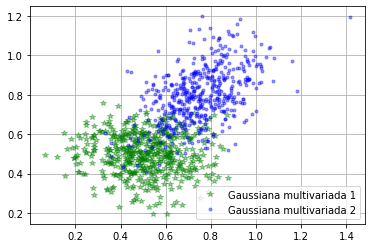

In [10]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [0.5, 0.5]
cov1 = [[0.02, 0], [0, 0.01]]
x1 = np.random.multivariate_normal(mean1, cov1, 500)
y1 = np.zeros((500,1), dtype='uint')

mean2 = [0.75, 0.8]
cov2 = [[0.02, 0.01], [0.01, 0.02]]
x2 = np.random.multivariate_normal(mean2, cov2, 500)
y2 = np.ones((500,1), dtype='uint')

x, y = np.concatenate((x1, x2), axis=0), np.concatenate((y1, y2), axis=0)

plt.plot(x1[:,0], x1[:,1], '*', label='Gaussiana multivariada 1', c='g', alpha=0.4)
plt.plot(x2[:,0], x2[:,1], '.', label='Gaussiana multivariada 2', c='b', alpha=0.4)
plt.legend()
plt.grid(True)
plt.show()

1.1 En este paso construiremos la red neuronal perceptron multicapa que utilizaremos para clasificar los datos provenientes de las dos Gaussianas multivariadas. Para esto utilizaremos las siguientes especificaciones:
1. Una capa oculta de 8 neuronas y una capa de salida de 1 neurona.
2. Función de activación sigmoide.
3. Función de divergencia de entropía cruzada binaria.


(10 pts.)

In [9]:
# Su respuesta aquí.

import tensorflow as tf



class PerceptronMulticapa:
    '''
    primero definir una clase para la red neuronal, la cual recibe como parámetros las dimensiones de entrada, 
    oculta y salida, asi como el learning rate necesario para la actualización de los parámetros.
    '''
    def __init__(self, dim_entrada, nodosCapaOculta, dim_salida, tasa_aprendizaje): 
        
        #definición de los parámetros de la red.
        muestras, caracteristicas =dim_entrada
        self.nodosCapaOculta=nodosCapaOculta #1 capa de 8 neuronas
        self.pesos1= tf.Variable(tf.random.normal([caracteristicas+1,self.nodosCapaOculta], dtype= tf.float64) ,name = "pesos1")
        self.pesos2= tf.Variable(tf.random.normal([self.nodosCapaOculta+1, dim_salida], dtype= tf.float64) ,name = "pesos2")
     
    def forward(self, x, y):
        '''
        Acá se calcula el valor predicho por la red, así como los valores intermedios de la capa oculta.
        Se deben tener en cuenta las funciones de activación y de costo. Estas y sus derivadas pueden 
        programarse como funciones aparte.
        '''
        #
        
        # X^1 = f(W^1X^0)
        # X^2 = f(W^2X^1)
        # Loss(y,X^2)  #entropía cruzada binaria
            
        with tf.GradientTape(persistent=True) as t:

            # Primera capa oculta
            self.bias1 = tf.constant(1, dtype=tf.float64, shape=(muestras,1), name='bias1')
            
            a= tf.concat([self.bias1,x],1)
            z=tf.matmul(a,pesos1)
            transformacion1= tf.nn.sigmoid(z)

            #Capa de salida
            self.bias2 = tf.constant(1, dtype=tf.float64, shape=(muestras,1), name='bias2')
            a2= tf.concat([self.bias2,transformacion1],1)
            z2= tf.matmul(a2,pesos2)
            #transformacion2= tf.nn.sigmoid(z2)
            perdida= tf.nn.sigmoid_cross_entropy_with_logits(logits=z2, labels=y)


    def backward(self, x, y):
        '''
        Acá se calculan los nuevos parámetros de la red utilizando el método de backpropagation 
        y gradient descent.

        '''
        # dW2 = Loss' * f(W^2X^1)' * (W^2X^1)'
        # dW1 = ...

        dW2=t.gradient(perdida,z2)
        dW1=t.gradient(perdida,z)
        
        #######################
        # W2 -= learnng_rate * dW2 
        # W1 -= learnng_rate * dW1

        pesos2 -=tasa_aprendizaje*dW2
        pesos1 -=tasa_aprendizaje*dW1


In [ ]:
def sigmaprime(x):
        return tf.multiply(sigma(x), tf.subtract(tf.constant(1.0), sigma(x)))   #referencia https://blog.aloni.org/posts/backprop-with-tensorflow/


In [3]:
import tensorflow as tf

x = tf.constant([3.0, 3.0])

with tf.GradientTape() as t:
  t.watch(x)
  z = tf.multiply(x, x)

#print(z)

# Find derivative of z with respect to the original input tensor x
print(t.gradient(z, x))


tf.Tensor([6. 6.], shape=(2,), dtype=float32)


In [5]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as t: #persistent=True permite usar varias veces los datos de GradientTape()
  # Don't need any calls to watch(), as when variables x and y
  # get used, they will be automatically watched
  y_sq = y * y
  z = x + y_sq


In [6]:
print(t.gradient(z,x))
print(t.gradient(z,y))

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


1.2 Utilizando los datos proveídos construya los un conjunto de entrenamiento(60%), validación (20%) y test (20%). Asegurese de que al menos en el conjunto de entrenamento los datos se encuentren aleatorizados respecto a su clase. 

(3 pts.)

In [12]:
import pandas as pd

x_df= pd.DataFrame(x)
y_df= pd.DataFrame(y)


semilla=8
np.random.seed(semilla)
x_train, x_test, x_validation=np.split(x_df.sample(frac=1), [int(.6*len(x_df)), int(.8*len(x_df))])

np.random.seed(semilla)
y_train, y_test, y_validation=np.split(y_df.sample(frac=1), [int(.6*len(y_df)), int(.8*len(y_df))])


1.3 Entrene la red neuronal construida en el primer paso, variando el learning rate en cada entrenamiento. Se pide probar con las siguientes alternativas: [1, 0.1, 0.01, 0.001, 0.0001, 0.00001].
Por cada entrenamiento utilize al menos 300 épocas y muestre la curvas de aprendizaje para accuracy y loss. 
Las curvas deben ser construidas utilizando el conjunto de entrenamiento y de validación.

¿Cuál es la mejor alternativa de learning rate para el problema propuesto? ¿Por qué? 

(7 pts.)

In [13]:
x_train.shape

(600, 2)

In [3]:
# Su respuesta aquí.

PerceptronMulticapa(x_train.shape,8,)

## Pregunta 2: Entendiendo las operaciones convolucionales

En este apartado vamos a investigar de manera gráfica cuál es el resultado de una operación de convolución, que corresponde a la capacidad de una red convolucional de generar representaciones a partir de una imágen.

<img src="images/cute_cat.jpeg" alt="drawing" width="400"/>

2.1 Cargue a imagen anterior como una matriz NumPy. Luego normalice la imagen de tal forma que sus valores estén dentro del rango [-0.5, 0.5]

(3 pts.)

In [4]:
# Su respuesta aquí.

import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler




cat= Image.open("images/cute_cat.jpeg")
#cat_data=cat.getdata()
#print(cat_data)
#arreglo_gato=np.array(cat_data)

arreglo_gato= np.asarray(cat)

#escalador=MinMaxScaler((-.5,.5))
#gato_escalado=escalador.fit_transform(arreglo_gato)





2.2 Elija dos kernel de tamaño 3x3 (ej. border detection, sharpen, box blur kernels, etc. Estos los puede encontrar [acá](https://en.wikipedia.org/wiki/Kernel_(image_processing))) y convolucione la imagen con cada uno de ellos. Para esto puede ocupar su propia función de convolución o utilzar la función [scipy.ndimage.filters.convolve](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.convolve.html), utiizando borde constante.

(6 pts.)

In [105]:
# Su respuesta aquí.
from scipy import ndimage

kernel_edge_detection= np.array([[-1,-1,-1], [-1,-8,-1],[-1,-1,-1]])






cat_edge_arr=ndimage.convolve(arreglo_de_gato,kernel_edge_detection)






In [19]:
from scipy import ndimage

#kernel_sharpen= np.array([[[0,-1,0],[-1,5,-1],[0,-1,0]]])

#sharpen= np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen= np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernel_sharpen= np.array([sharpen,sharpen, sharpen])
sharpened_cat= ndimage.convolve(arreglo_gato,kernel_sharpen)

sharpened_cat_img= Image.fromarray(sharpened_cat).save('sharpened_cat.png')

In [11]:
arreglo_gato


array([[[210, 206, 203],
        [213, 209, 206],
        [217, 213, 210],
        ...,
        [206, 201, 197],
        [205, 200, 196],
        [205, 200, 196]],

       [[213, 209, 206],
        [215, 211, 208],
        [217, 213, 210],
        ...,
        [203, 198, 194],
        [202, 197, 193],
        [202, 197, 193]],

       [[218, 214, 211],
        [218, 214, 211],
        [218, 214, 211],
        ...,
        [201, 196, 192],
        [200, 195, 191],
        [199, 194, 190]],

       ...,

       [[207, 186, 167],
        [207, 186, 167],
        [205, 184, 165],
        ...,
        [166, 145, 124],
        [169, 148, 127],
        [169, 148, 127]],

       [[201, 180, 161],
        [205, 184, 165],
        [206, 185, 166],
        ...,
        [172, 151, 130],
        [172, 151, 130],
        [170, 149, 128]],

       [[196, 175, 156],
        [201, 180, 161],
        [205, 184, 165],
        ...,
        [183, 161, 140],
        [181, 159, 138],
        [178, 156, 135]]

In [110]:
kernel_gBlur= np.array([[[1,2,1],[2,4,2],[1,2,1]]])/16

gblurred_cat_arr=ndimage.convolve(arreglo_gato,kernel_gBlur)

gblurred_img= Image.fromarray(gblurred_cat_arr).save('difuminado.png')


In [2]:
def aplicar_guardar(kernel,arreglo_imagen,nombre):
    arreglo_convolucionado=ndimage.convolve(arreglo_imagen,kernel)
    Image.fromarray(arreglo_convolucionado).save(nombre)

In [113]:
aplicar_guardar(kernel_gBlur,arreglo_gato,'prueba.png')

2.3 Una vez convolucionada la imagen, convierta a cero los valores menores a cero. Para esto puede usar la función [np.clip](https://numpy.org/doc/1.18/reference/generated/numpy.clip.html). En otras palabras:
```
if x < 0:
    x = 0
else:
    x = x

```
(2 pts)

In [6]:
# Su respuesta aquí.

2.4 Implemente por su cuenta la operación de agregación estadística Max-Pooling. Para esto utilice kernel_size=4 y stride=4.

(6 pts.)

In [7]:
# Su respuesta aquí.

2.5 Muestre los resultados de las operaciones realizadas. ¿Qué puede decir acerca de ellos? ¿Cómo cree que estas operaciones pueden ser de utilidad para una red neuronal a la hora de realizar una tarea de clasificación?

(3 pts.)

In [8]:
# Su respuesta aquí.

# Pregunta 3: Construyendo una Red Convolucional

The Street View House Numbers ([SVHN](http://ufldl.stanford.edu/housenumbers/)) [1] es un conocido dataset, comunmente utilizado como benchmark para probar y comparar modelos de Machine Learning. Este dataset contiene imágenes de números de casa vistos desde la calle, los cuales se encuentran etiquetados y dicha etiqueta se asocia al dígito que se encuentra al centro de la imagen.

<img src="images/svhn.png" alt="drawing" width="400"/>


Los datos se encuentran públicamente disponibles a continuación:
1. [train set](http://ufldl.stanford.edu/housenumbers/train_32x32.mat)
2. [test set](http://ufldl.stanford.edu/housenumbers/test_32x32.mat)


[1] Netzer, Y., Wang, T., Coates, A., Bissacco, A., Wu, B., Y Ng, A.: Reading Digits in Natural Images with Unsupervised Feature Learning. NIPS (2011)

3.1 Cargue las imagenes y etiquetas del set de entrenamiento y test como matrices NumPy. Las etiquetas van del número del '1' al '10', donde la décima etiqueta se asocia al valor 0. Cambie el valor de la etiqueta '10', para que cada etiqueta quede asociada al dígito que representa. Finalmente, grafique 9 imágenes del conjunto de entrenamiento.

(3 pts.)

In [114]:
# Su respuesta aquí.

import scipy.io

mat = scipy.io.loadmat('train_32x32.mat')

datos=mat['X']
etiquetas=mat['y']
etiquetas[etiquetas == 10]=0

In [134]:
datos

array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

1
2
3
4
5
6
7
8
9


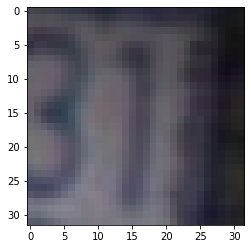

In [182]:
#datos.shape

datos[:,:,:,1].shape


#Image.fromarray(datos[:,:,:,1]).save('muestra.png')

for i in range(1,10):
    print(i)
    plt.imshow(Image.fromarray(datos[:,:,:,i]))

#print(Image.fromarray(datos[:,:,:,6]))


# Image.fromarray(arreglo_convolucionado).save('muestra')




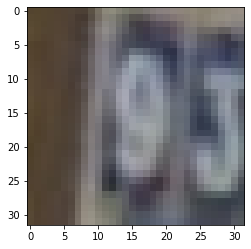

In [177]:
plt.imshow(Image.fromarray(datos[:,:,:,6]))

In [164]:
range(1,10)

range(1, 10)


In [130]:
#Para feedback

#print(etiquetas)
#np.savetxt("etiquetas_p3.csv",etiquetas,delimiter=',')

3.2 Para terminar el preprocesamiento de los datos, se pide que las etiquetas se presenten como variables categóricas. Esto es, para la etiqueta: 
```
0 = [1, 0, ... , 0]
1 = [0, 1, ... , 0]
...
N = [0, 0, ... , 1]
```
Además, se pide seleccionar un conjunto de validación para poder monitorear el sobreajuste del modelo sobre los datos de entrenamiento. Se pide que un 20% de los datos de entrenamiento sean utilizados para validación.

(3 pts.)

In [10]:
# Su respuesta aquí.

3.3 Para construir red convolucional, se utilizará una modificación la famosa arquitectura arquitectura AlexNet, propuesta por Alex Krizhevsky [2] [(lectura obligatoria)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).

Se pide especificamente construir una red convoucional con la siguiente arquitectura:

| Layer  | Operation|  Kernel |  Stride |  Activation | Maxpooling (stride) | Dropout (prob) |
|---|---|---|---|---|---|---|
|  1 | Convolución (32)  |  (3,3) |  1 |  ReLU |  No | No |
|  2 |  Convolución (32) | (3,3)  |  1 | ReLU  |  Yes (2,2) | No |
|  3 |  Convolución (64) | (3,3)  |  1 | ReLU  |  No | No |
|  4 |  Convolución (64) | (3,3)  |  1 | ReLU  |  Yes (2,2) | Yes(0.25) |
|  5 |  Densa (512) | -  | - | ReLU  | No | Yes(0.5) |
|  5 |  Densa (10) | -  | - | Softmax  | No | No |


Calcule el número de parámetros a dicha arquitectura.

[2] Krizhevsky, A., Sutskever, I., Hinton, G.: ImageNet Classification with Deep Convolutional Neural Networks. NIPS (2012)

(8 pts.)

In [11]:
# Su respuesta aquí.

3.4 Entrene esta red neuronal utilizando la función de costos correspondiente y las siguientes consideraciones:

1. Optimizador Adam (lr=0.0001)
2. batch size = 64 
3. Número de epocas = 10

**OBS: debe tener en cuenta que el proceso de entrenamiento CPU puede demorar algunas horas. Si dispone de GPU (o utiliza coblab), puede acelerar este proceso y demorarse incluso minutos**

(3 pts.)

In [12]:
# Su respuesta aquí.

3.5 Grafique dos curvas de aprendizaje, donde en el eje x se muestre el número de épocas y en el eje y se muestre la función de pérdida / accuracy respectivamente. Este gráfico debe contener los valores para el conjunto de entrenamiento, validación y el resultado final medido sobre el conjunto de test.

(3 pts.)

In [13]:
# Su respuesta aquí.